In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
import lightgbm as lgb

In [4]:
if 0:
    sys.path.insert(0,os.getcwd()+"/../../src/main")
else:
    sys.path.insert(0, "/mnt/lanlep2019/src/main")
    os.environ['LOCAL']="/mnt/local"

In [5]:
!echo $LOCAL

/mnt/local


In [6]:
!mkdir -p $LOCAL/sandbox

In [7]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/mnt/local/sandbox'

In [8]:
os.environ['LANLEP_HOME']=HOME

In [9]:
import data

In [10]:
if 0:
    !ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/
else:
    !cd {HOME}/input/feat/ && cat /mnt/lizhen-east2/notebook/fastseq/5/tmp.tar | tar xf - 
    !cd {HOME}/input/feat/ && cat /mnt/lizhen-east2/notebook/fastseq/5/tmppkl.tar | tar xf -     

In [13]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.py'>

In [31]:
if 1:
    a = fastparquet.ParquetFile("./input/feat/dense_train_seq_fwv_offset_0.parq").to_pandas()
    b = fastparquet.ParquetFile("./input/feat/dense_train_seq_fwv_offset_0.parq").to_pandas()
    traintest=(a+b)/2

In [52]:
traintest.sort_index().head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_00_0000_000000  0.212595  0.186531  0.108111 -0.080589  0.065728   
quake_00_0000_001500  0.212516  0.188319  0.106716 -0.079172  0.066694   
quake_00_0000_003000  0.214432  0.187131  0.106812 -0.077877  0.061428   
quake_00_0000_004500  0.212495  0.189189  0.107774 -0.077747  0.061508   
quake_00_0000_006000  0.213956  0.189141  0.109651 -0.079858  0.059636   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  \
index                                                                    
quake_00_0000_000000 -0.132268 -0.026067  0.159261  0.183558  0.005655   
quake_00_0000_001500 -0.132475 -0.027120  0.154853  0.183297  0.007408   
quake_00_0000_003000 -0.135882 -0.022667  0.150094  0.182040  0.010890   
quake_00_0000_004500 -0.139763 -0.024054  0.146012  0.182956  0.017830   
quake_00_0000_006000 -0.139901 -0.024194  0.149638  0.180204  0.018187   

                        ...       fwv_91    fwv_92    fwv_93    fwv_94  \
index                   ...                                              
quake_00_0000_000000    ...     0.196776  0.129668  0.063741 -0.077696   
quake_00_0000_001500    ...     0.196935  0.130682  0.064529 -0.074662   
quake_00_0000_003000    ...     0.197411  0.134085  0.064791 -0.074045   
quake_00_0000_004500    ...     0.194213  0.137140  0.065718 -0.072074   
quake_00_0000_006000    ...     0.194038  0.136319  0.062101 -0.072614   

                        fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  \
index                                                                    
quake_00_0000_000000  0.010100 -0.029834 -0.108256  0.049204  0.044072   
quake_00_0000_001500  0.016100 -0.028593 -0.105153  0.049901  0.041493   
quake_00_0000_003000  0.017787 -0.030949 -0.102674  0.048797  0.037867   
quake_00_0000_004500  0.014720 -0.033667 -0.102633  0.049442  0.032632   
quake_00_0000_006000  0.017543 -0.033567 -0.101820  0.049855  0.035245   

                             y  
index                           
quake_00_0000_000000  1.430797  
quake_00_0000_001500  1.430796  
quake_00_0000_003000  1.429798  
quake_00_0000_004500  1.429797  
quake_00_0000_006000  1.428700  

[5 rows x 101 columns]

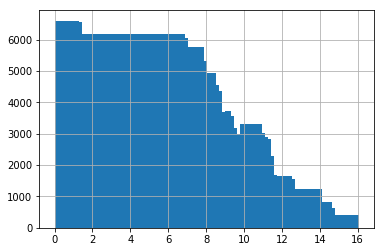

In [33]:
traintest.y.hist(bins=100);

In [34]:
np.abs(traintest.y-traintest.y.median()).mean()

3.02918898210172

In [35]:
traindf=traintest.drop('y',axis=1)
ydf=traintest.y
qdf=traindf.index.map(lambda u: int(u.split("_")[1]))

In [36]:
idx=~qdf.isin({0,16})
traindf=traindf[idx]
ydf=ydf[idx]
qdf=qdf[idx]

In [37]:
ydf.shape,traindf.shape

((409394,), (409394, 100))

In [38]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
colors= [
        "FF0000", "00FF00", "0000FF", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0", 
    ]
colors=[np.array([int(h[i:i+2], 16)/255.0 for i in (0, 2 ,4)]) for h in colors]

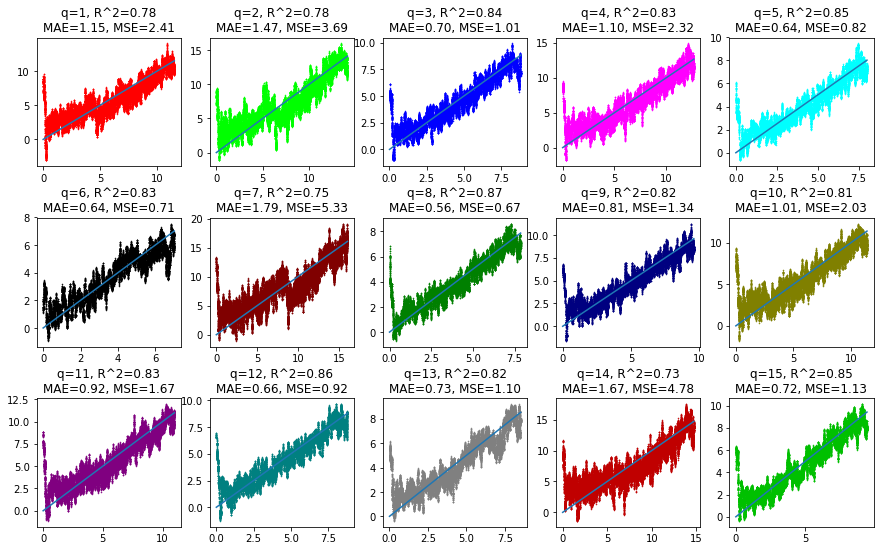

In [40]:
fig, axs = plt.subplots(figsize=(15,9), 
                        nrows=3, ncols=5,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

references=sorted(set(qdf))

for ax, (i,qno) in zip(axs.flatten(), enumerate(references)):
    X=traindf[qdf==qno]
    Y=ydf[qdf==qno]
    reg = Ridge().fit(X,Y)
    x,y=Y,reg.predict(X)
    ax.scatter(x.values,y,s=0.3,c=colors[i])
    b=sorted(x.values)
    ax.plot(b,b)
    ax.set_title('q={}, R^2={:.2f}\nMAE={:.2f}, MSE={:.2f}'.format(qno,r2_score(x,y), mean_absolute_error(x,y)
                                                                   ,mean_squared_error(x,y)))
    

In [41]:
#! cd /mnt && tar xf /mnt/lizhen-east2/notebook/fastseq/5/trainqs.tar

In [35]:
def readq(qno):
    return fastparquet.ParquetFile("/mnt/quake_{}.parq".format(qno)).to_pandas()

In [58]:
q=readq(14)

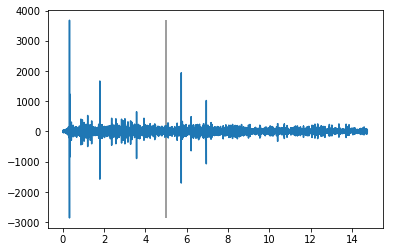

In [59]:
plt.plot(q.time_to_failure, q.acoustic_data);
plt.vlines(x=5,ymin=q.acoustic_data.min(), ymax=q.acoustic_data.max(),alpha=0.5);

In [42]:
reg = LinearRegression().fit(traindf, ydf)

In [43]:
reg.score(traindf,ydf)

0.47749277921675126

In [44]:
trainpred=reg.predict(traindf)

In [45]:
err=ydf.values-trainpred
np.sqrt(np.mean(err*err)),np.sqrt(np.median(np.abs(err)))

(2.6242166651851453, 1.3087841294000262)

In [46]:
a=ydf.copy().to_frame()
a['pred']=trainpred
a['abserr']=np.abs(a['pred']-a['y'])
a['qno']=a.index.map(lambda u: int(u.split("_")[1]))

In [47]:
a.groupby('qno')['abserr'].apply(lambda u: np.sqrt(np.mean(u.values**2))).sort_values()

qno
11    1.631354
9     1.644194
10    1.805674
12    1.875820
1     1.888808
3     1.897652
15    2.231170
13    2.233907
4     2.364902
5     2.658899
8     2.727387
6     2.837420
2     3.057987
14    3.505263
7     4.003069
Name: abserr, dtype: float64

In [48]:
a.groupby('qno')['abserr'].apply(lambda u:  np.mean(u.values)).sort_values()

qno
9     1.134728
11    1.205874
10    1.388971
3     1.443394
12    1.443830
1     1.481676
15    1.782918
13    1.812713
4     1.998983
5     2.332561
8     2.474056
6     2.487523
2     2.559095
14    2.991004
7     3.303495
Name: abserr, dtype: float64

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
colors= [
        "FF0000", "00FF00", "0000FF", "FF00FF", "00FFFF", "000000", 
        "800000", "008000", "000080", "808000", "800080", "008080", "808080", 
        "C00000", "00C000", "0000C0", "C0C000", "C000C0", "00C0C0", "C0C0C0", 
        "400000", "004000", "000040", "404000", "400040", "004040", "404040", 
        "200000", "002000", "000020", "202000", "200020", "002020", "202020", 
        "600000", "006000", "000060", "606000", "600060", "006060", "606060", 
        "A00000", "00A000", "0000A0", "A0A000", "A000A0", "00A0A0", "A0A0A0", 
        "E00000", "00E000", "0000E0", "E0E000", "E000E0", "00E0E0", "E0E0E0", 
    ]
colors=[np.array([int(h[i:i+2], 16)/255.0 for i in (0, 2 ,4)]) for h in colors]

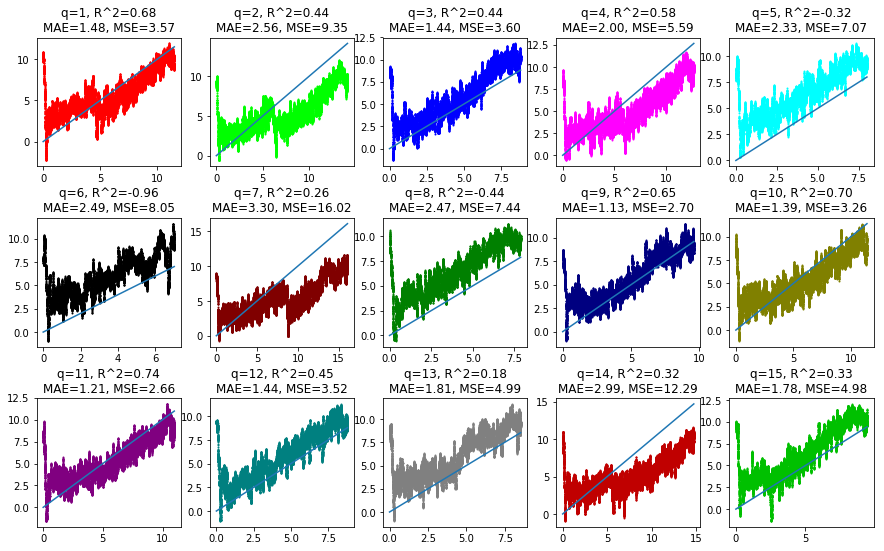

In [51]:
fig, axs = plt.subplots(figsize=(15,9), 
                        nrows=3, ncols=5,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

references=sorted(set(a['qno']))

for ax, (i,qno) in zip(axs.flatten(), enumerate(references)):
    x,y=a[a['qno']==qno]['y'],a[a['qno']==qno]['pred']
    ax.scatter(x,y,s=1,c=colors[i])
    b=sorted(x.values)
    ax.plot(b,b)
    ax.set_title('q={}, R^2={:.2f}\nMAE={:.2f}, MSE={:.2f}'.format(qno,r2_score(x,y), mean_absolute_error(x,y)
                                                                   ,mean_squared_error(x,y)))
    